# Iris Dataset - SOFENN Example

Demonstrate multi-class classification with SOFENN on classic Iris Dataset

In [1]:
import numpy as np
import random as rnd

from sklearn import datasets
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

import keras
import keras.backend as K

from keras.optimizers import SGD
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input

from sofenn.FuzzyNetwork import FuzzyNetwork
#from sofenn.layers.DefuzzyLayer import DefuzzyLayer
from sofenn.layers import FuzzyLayer, NormalizedLayer, WeightedLayer, OutputLayer

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


## Read in and prep Iris Dataset

In [2]:
# read in iris dataset
iris = datasets.load_iris()
# create one-hot encoded vector for each class
Y = []
for y in iris.target:
    tmp = np.zeros(3)
    tmp[y] = 1
    Y.append(tmp)
Y = np.array(Y)
    
# split to train/test
X_train, X_test, y_train, y_test = train_test_split(iris.data, Y, test_size=0.1)

In [3]:
fuzz = FuzzyNetwork(
            X_train, X_test, y_train, y_test,           # data attributes
            neurons=3, max_neurons=100,                 # initialization parameters
            eval_thresh=0.5, ifpart_thresh=0.1354       # evaluation and ifpart threshold
            )

Building Fuzzy Network with 3 neurons...
Instructions for updating:
Colocations handled automatically by placer.
...Model successfully built!


In [4]:
fuzz.compile_model()

Compiling model...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inputs (InputLayer)             (None, 4)            0                                            
__________________________________________________________________________________________________
FuzzyRules (FuzzyLayer)         (None, 3)            24          Inputs[0][0]                     
__________________________________________________________________________________________________
Normalization (NormalizedLayer) (None, 3)            0           FuzzyRules[0][0]                 
__________________________________________________________________________________________________
Weights (WeightedLayer)         (None, 3)            15          Inputs[0][0]                     
                                                                 Normalization[0][0]      

In [19]:
fuzz.train_model(epochs=150)

Training model...
Epoch 1/150
135/135 [==============================] - 0s 198us/step - loss: 3.3910 - binary_accuracy: 0.8691
Epoch 2/150
135/135 [==============================] - 0s 271us/step - loss: 3.3590 - binary_accuracy: 0.8667
Epoch 3/150
135/135 [==============================] - 0s 268us/step - loss: 3.2769 - binary_accuracy: 0.8716
Epoch 4/150
135/135 [==============================] - 0s 152us/step - loss: 3.2974 - binary_accuracy: 0.8889
Epoch 5/150
135/135 [==============================] - 0s 192us/step - loss: 3.3899 - binary_accuracy: 0.8963
Epoch 6/150
135/135 [==============================] - 0s 148us/step - loss: 3.2815 - binary_accuracy: 0.8963
Epoch 7/150
135/135 [==============================] - 0s 149us/step - loss: 3.3383 - binary_accuracy: 0.8988
Epoch 8/150
135/135 [==============================] - 0s 146us/step - loss: 3.1662 - binary_accuracy: 0.9037
Epoch 9/150
135/135 [==============================] - 0s 128us/step - loss: 3.2133 - binary_accuracy:

135/135 [==============================] - 0s 125us/step - loss: 2.3929 - binary_accuracy: 0.9679
Epoch 75/150
135/135 [==============================] - 0s 152us/step - loss: 2.3076 - binary_accuracy: 0.9679
Epoch 76/150
135/135 [==============================] - 0s 142us/step - loss: 2.4003 - binary_accuracy: 0.9679
Epoch 77/150
135/135 [==============================] - 0s 144us/step - loss: 2.3488 - binary_accuracy: 0.9679
Epoch 78/150
135/135 [==============================] - 0s 121us/step - loss: 2.3875 - binary_accuracy: 0.9679
Epoch 79/150
135/135 [==============================] - 0s 132us/step - loss: 2.2987 - binary_accuracy: 0.9679
Epoch 80/150
135/135 [==============================] - 0s 145us/step - loss: 2.3878 - binary_accuracy: 0.9679
Epoch 81/150
135/135 [==============================] - 0s 126us/step - loss: 2.3979 - binary_accuracy: 0.9679
Epoch 82/150
135/135 [==============================] - 0s 152us/step - loss: 2.2507 - binary_accuracy: 0.9679
Epoch 83/150
1

135/135 [==============================] - 0s 140us/step - loss: 1.7072 - binary_accuracy: 0.9827
Epoch 148/150
135/135 [==============================] - 0s 141us/step - loss: 1.6641 - binary_accuracy: 0.9852
Epoch 149/150
135/135 [==============================] - 0s 137us/step - loss: 1.5544 - binary_accuracy: 0.9852
Epoch 150/150
135/135 [==============================] - 0s 158us/step - loss: 1.6736 - binary_accuracy: 0.9852


In [20]:
fuzz._get_layer_weights('FuzzyRules')

[array([[ 5.768369  ,  6.614032  ,  6.2880197 ],
        [ 3.832551  ,  1.6419564 ,  1.7739422 ],
        [ 1.0800704 ,  5.4248953 ,  5.812782  ],
        [-0.24797764,  2.7074351 ,  2.991282  ]], dtype=float32),
 array([[3.8047884, 3.860032 , 4.059248 ],
        [3.128168 , 2.0678172, 2.5486522],
        [3.4308414, 3.4840136, 3.383101 ],
        [2.971439 , 2.8971577, 2.6608484]], dtype=float32)]

In [21]:
X_test

array([[5. , 3.5, 1.6, 0.6],
       [6.8, 2.8, 4.8, 1.4],
       [5. , 3.3, 1.4, 0.2],
       [5.6, 2.9, 3.6, 1.3],
       [6.2, 2.2, 4.5, 1.5],
       [6.9, 3.1, 5.4, 2.1],
       [6.9, 3.2, 5.7, 2.3],
       [5.3, 3.7, 1.5, 0.2],
       [6.7, 3.1, 4.4, 1.4],
       [6.1, 2.8, 4.7, 1.2],
       [5.2, 3.4, 1.4, 0.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.4, 3. , 1.3, 0.2],
       [4.9, 3.6, 1.4, 0.1],
       [5.8, 2.7, 3.9, 1.2]])

In [22]:
y_test

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [23]:
y_pred = fuzz.model.predict(X_test)
y_pred.round()

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [24]:
acc = y_test == y_pred.round()
acc

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True, False, False],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [25]:
acc.sum() / acc.size

0.9555555555555556

## Model Prediction Results

In [26]:
pred_loss, pred_bin_acc = fuzz.model.evaluate(X_test, y_test)
print('Model Loss: {:0.8f}'.format(pred_loss))
print('Binary Accuracy: {:2.1f}%'.format(100*pred_bin_acc))

15/15 [==============================] - 0s 146us/step
Model Loss: 0.95978558
Binary Accuracy: 95.6%


In [27]:
fuzz.model.metrics_names

['loss', 'binary_accuracy']

## Plot Results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


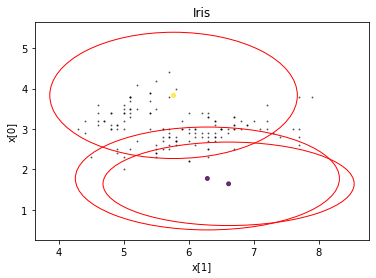

In [28]:
w = fuzz._get_layer_weights('FuzzyRules')


plt.clf()
plt.title('Iris')
plt.ylabel('x[0]')
plt.xlabel('x[1]')
plt.scatter([a[0] for a in X_train], [a[1] for a in X_train], c=(0,0,0), alpha=0.5,s=1)
for i in range(0,fuzz.neurons):
    ellipse = Ellipse((w[0][0][i], w[0][1][i]), w[1][0][i],w[1][1][i], color='r', fill=False)
    ax = plt.gca()
    ax.add_patch(ellipse)

plt.scatter(w[0][0], w[0][1], c=(1,0,0), alpha=0.8,s=15)
plt.show()

In [29]:
fuzz.model_predictions().round()

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [30]:
fuzz.error_criterion()

False

In [31]:
fuzz.if_part_criterion()

True

In [32]:
raw_pred = fuzz.model_predictions()
raw_pred

array([[9.58819568e-01, 4.11310978e-02, 4.92765030e-05],
       [2.84998566e-02, 5.39508581e-01, 4.31991577e-01],
       [9.70022798e-01, 2.99519673e-02, 2.52563823e-05],
       [2.83717602e-01, 6.59990788e-01, 5.62915914e-02],
       [1.62468832e-02, 4.47901368e-01, 5.35851777e-01],
       [1.42307917e-03, 1.58290431e-01, 8.40286493e-01],
       [4.05013358e-04, 8.61225724e-02, 9.13472414e-01],
       [9.83218610e-01, 1.67739093e-02, 7.50510844e-06],
       [1.01832844e-01, 7.05255806e-01, 1.92911416e-01],
       [6.16431236e-02, 6.55175924e-01, 2.83180922e-01],
       [9.75430667e-01, 2.45527308e-02, 1.66439568e-05],
       [5.89809939e-03, 3.00638765e-01, 6.93463147e-01],
       [9.49145436e-01, 5.07775247e-02, 7.70165279e-05],
       [9.80695128e-01, 1.92948133e-02, 1.00532488e-05],
       [1.85413212e-01, 7.11119831e-01, 1.03466950e-01]], dtype=float32)

In [33]:
mean_absolute_error(fuzz.y_test, y_pred)

0.1340663766861932

In [34]:
fuzz.model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 121us/step


[0.9597855806350708, 0.9555556178092957]

<function sofenn.FuzzyNetwork.FuzzyNetwork.loss_function(y_true, y_pred)>